In [255]:
!pip install numpy
!pip install pandas
!pip install matplotlib

In [256]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [257]:
dataset = pd.read_csv('kc_house_data.csv')

In [258]:
dataset.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [259]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

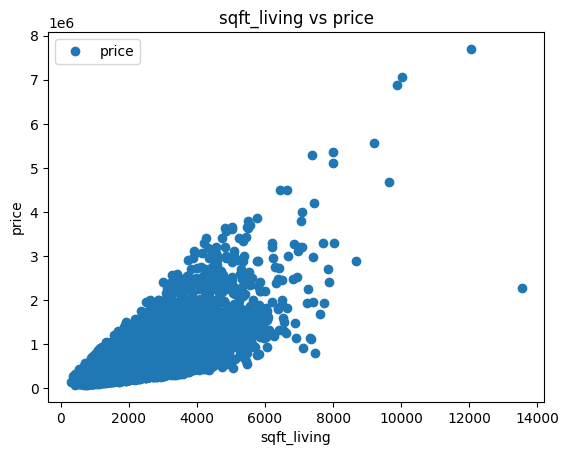

In [260]:
# (a) fit a linear model to the data using the least squares method

dataset.plot(x='sqft_living', y='price', style='o')
plt.title('sqft_living vs price')
plt.xlabel('sqft_living')
plt.ylabel('price')
plt.show()


In [261]:
x = dataset['sqft_living']
y = dataset['price']

all_ones = np.ones(len(x))
At = np.array([all_ones, x, x ** 2], dtype=float)

A = np.transpose(At)
y = np.array(y, dtype=float)

B = np.dot(At, A)
b = np.dot(At, y)
print(x)
print(y)
print(np.linalg.solve(B, b))

0        1180
1        2570
2         770
3        1960
4        1680
         ... 
21608    1530
21609    2310
21610    1020
21611    1600
21612    1020
Name: sqft_living, Length: 21613, dtype: int64
[221900. 538000. 180000. ... 402101. 400000. 325000.]
[1.99222279e+05 6.79940947e+01 3.85812609e-02]


In [262]:
Y = np.dot(A, np.linalg.solve(B, b))
# find error
error = np.linalg.norm((y - Y)**2)
percentage = error / np.linalg.norm(y)**2
print(f"Error in percentage is: {percentage}%")

Error in percentage is: 0.005416609322542455%


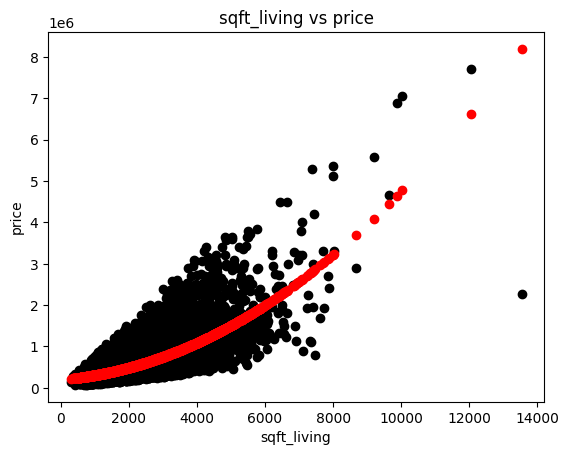

In [263]:
# plot the best fit line
plt.scatter(x, y, color='black')
plt.scatter(x, Y, color='red', linewidth=1)
plt.title('sqft_living vs price')
plt.xlabel('sqft_living')
plt.ylabel('price')
plt.show()

In [264]:
price = dataset['price']
sqft_living = dataset['sqft_living']

In [265]:
# Add a column of ones to sqft_living for the intercept term
A = np.column_stack((np.ones(sqft_living.shape[0]), sqft_living))
y = price.values

In [291]:
# Householder QR Decomposition function
def householderQR(A):
    m, n = A.shape
    Q = np.eye(m)  # Initialize Q as an identity matrix
    print(f"m is : {m}")
    print(f"n is : {n}")
    
    for j in range(n):
        # Calculate the Householder vector
        x = A[j:, j]
        v = np.sign(x[0]) * np.linalg.norm(x) * np.eye(len(x), 1).flatten() + x
        v = v / np.linalg.norm(v)

        # Form the Householder matrix
        Hj = np.eye(m)
        Hj[j:, j:] -= 2 * np.outer(v, v)

        print(f"--------- H{j+1} -----------")
        # Apply the Householder transformation
        A = np.dot(Hj, A)
        Q = np.dot(Q, Hj)  # Update Q

    R = A
    return Q, R

# Perform the decomposition
Q, R = np.linalg.qr(A)

In [292]:
# Reconstruct A from Q and R
A_reconstructed = np.dot(Q, R)
# set R small values to zero
R[np.abs(R) < 1e-10] = 0
print(R)
# export the data of R to csv file
np.savetxt("R.csv", R, delimiter=",")




[[-1.47013605e+02 -3.05773558e+05]
 [ 0.00000000e+00 -1.35020183e+05]]


In [293]:
# Compute vector b as Q-transpose times y
b = np.dot(np.transpose(Q), y)
# make b_vec as np array
b_vec = np.array(b)
print(b.shape)
print(R.shape)
np.savetxt("B.csv", b_vec, delimiter=",")

(2,)
(2, 2)


In [294]:
def backward_substitution(A, b):
    # Solve for the coefficients (prices) using backward substitution
    m, n = A.shape
    x = np.zeros(n)

    for i in range(n-1, -1, -1):
        x[i] = (b[i] - np.dot(A[i, i+1:], x[i+1:])) / A[i, i]

    return x


In [295]:
# Solve for the polynomial coefficients
coefficients = backward_substitution(R, b)
print(coefficients)

[-43580.74309446    280.6235679 ]


In [296]:
# Define the polynomial function
def polynomial(x, coeffs):
    # This assumes coeffs is [beta_0, beta_1, beta_2]
    return coeffs[0] + coeffs[1]*x


In [297]:
# Create a string representation of the polynomial
polynomial_str = f'Price = {coefficients[0]} + {coefficients[1]}*SquareFootage'
print(polynomial_str)

Price = -43580.74309446248 + 280.62356789744416*SquareFootage


In [298]:
# find the error for first order polynomial
def error(y, y_hat):
    return np.linalg.norm(y - y_hat)**2 / np.linalg.norm(y)**2

In [299]:
error = error(price, polynomial(sqft_living, coefficients))
print(f"Error is: {error}")
# present the error in percentage
print(f"Error in percentage is: {error * 100}%")


Error is: 0.160271699232623
Error in percentage is: 16.0271699232623%


In [300]:
t = sqft_living
y = price.values
t_squared = t ** 2

A_2 = np.column_stack((np.ones(t.shape[0]), t, t_squared))

In [301]:
# Perform the decomposition using numpy QR factorization
Q, R = np.linalg.qr(A_2)

In [302]:
# Compute vector b as Q-transpose times y
b = np.dot(Q.T, y)


In [303]:
# Solve for the polynomial coefficients
coefficients_2 = backward_substitution(R, b)
print(coefficients_2)

[1.99222279e+05 6.79940947e+01 3.85812609e-02]


In [304]:
# Update the polynomial function
def polynomial_2(x, z, coeffs):
    # This assumes coeffs is [beta_0, beta_1 (for sqft_living), beta_2 (for sqft_living^2)]
    return coeffs[0] + coeffs[1]*x + coeffs[2]*z

In [305]:
# Update the string representation of the polynomial
polynomial_str = f'Price = {coefficients_2[0]} + {coefficients_2[1]}*SquareFootage + {coefficients_2[2]}*SquareFootage^2'
print(polynomial_str)

Price = 199222.27930549977 + 67.99409468578425*SquareFootage + 0.0385812609372035*SquareFootage^2


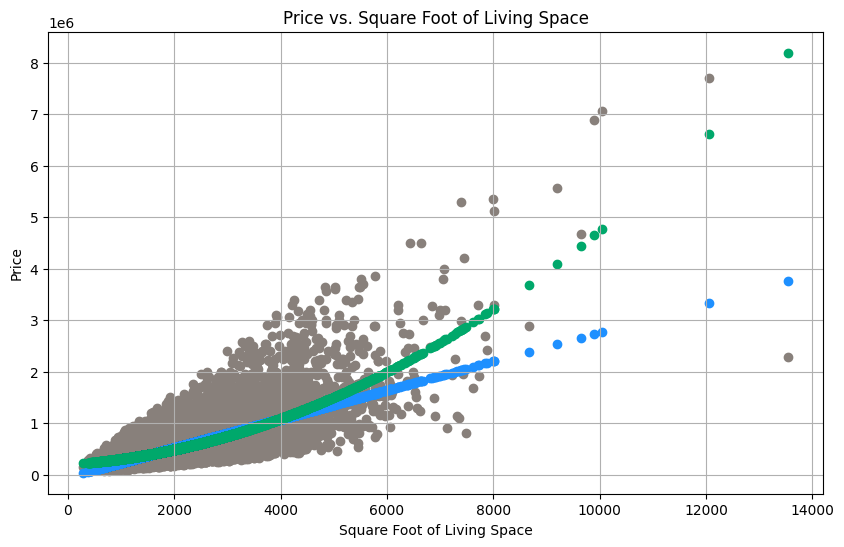

In [306]:
plt.figure(figsize=(10, 6))
plt.scatter(sqft_living, price, color='#88807B', linewidth=1)
plt.scatter(sqft_living, polynomial(sqft_living, coefficients), color='dodgerblue', linewidth=1)
plt.scatter(t, np.dot(A_2, coefficients_2), color='#00A86B', linewidth=1, label='2nd order')
plt.title("Price vs. Square Foot of Living Space")
plt.xlabel("Square Foot of Living Space")
plt.ylabel("Price")
plt.grid(True)
plt.show()


In [307]:
# find the error for second order polynomial
def error(y, y_hat):
    return np.linalg.norm(y - y_hat)**2 / np.linalg.norm(y)**2

error = error(price, polynomial_2(sqft_living, t_squared, coefficients_2))
print(f"Error is: {error}")
# present the error in percentage
print(f"Error in percentage is: {error * 100}%")

Error is: 0.14766545098399603
Error in percentage is: 14.766545098399602%
